In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib notebook

# helpers

In [64]:
def plot(x, y):
    plt.figure()
    plt.plot(x, y)

# Generate a signal composed of several frequencies

<IPython.core.display.Javascript object>


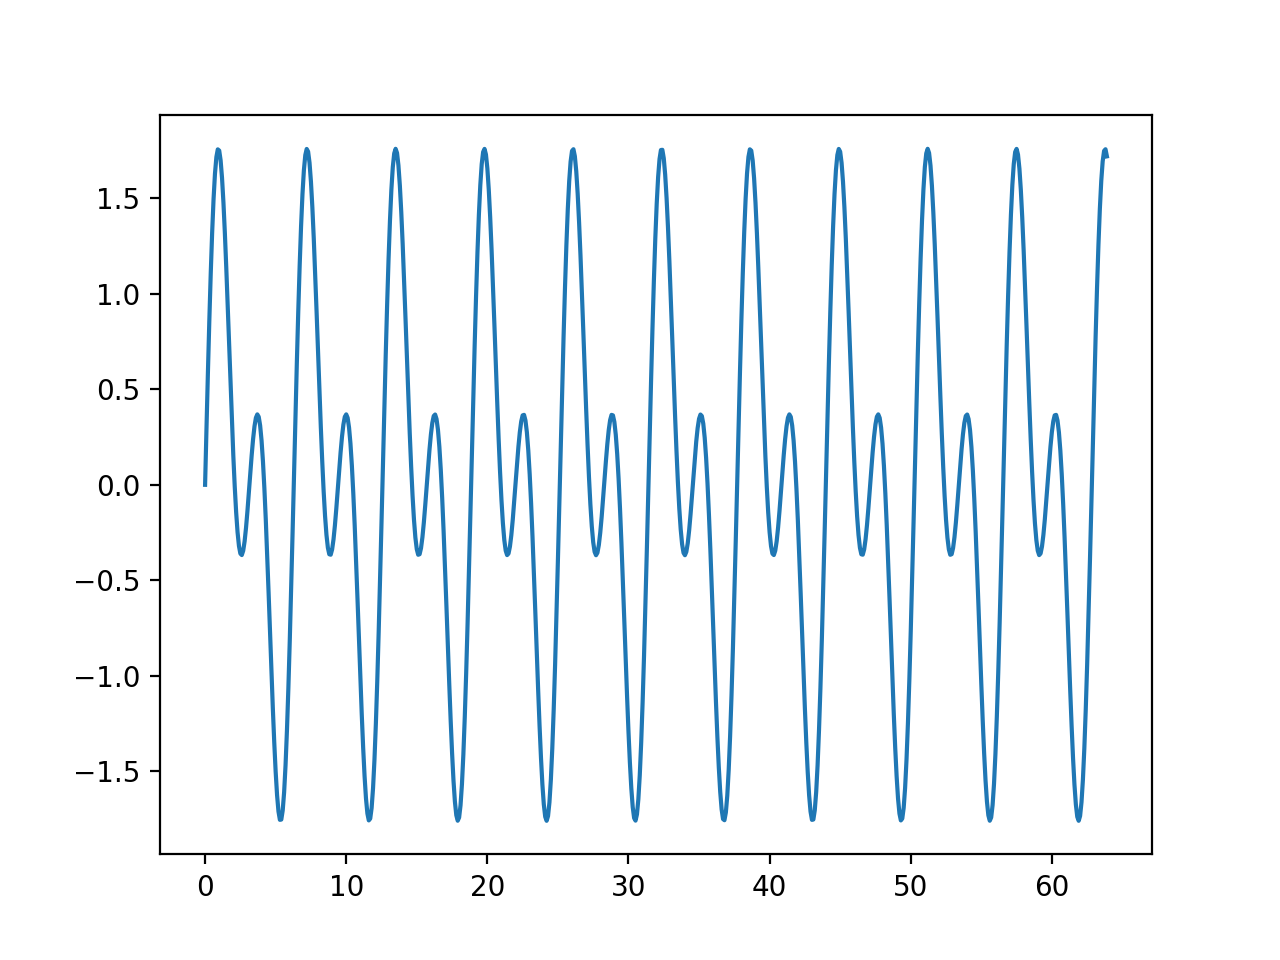

In [135]:
# list of frequencies that are combined
frequencies = [1, 2]

# generate signal
time = np.arange(0, 64, 0.1)
signal = np.zeros(len(time))
for f in frequencies:
    signal = np.add(signal, np.sin(f*time))

plot(time, signal)

# Add noise

<IPython.core.display.Javascript object>


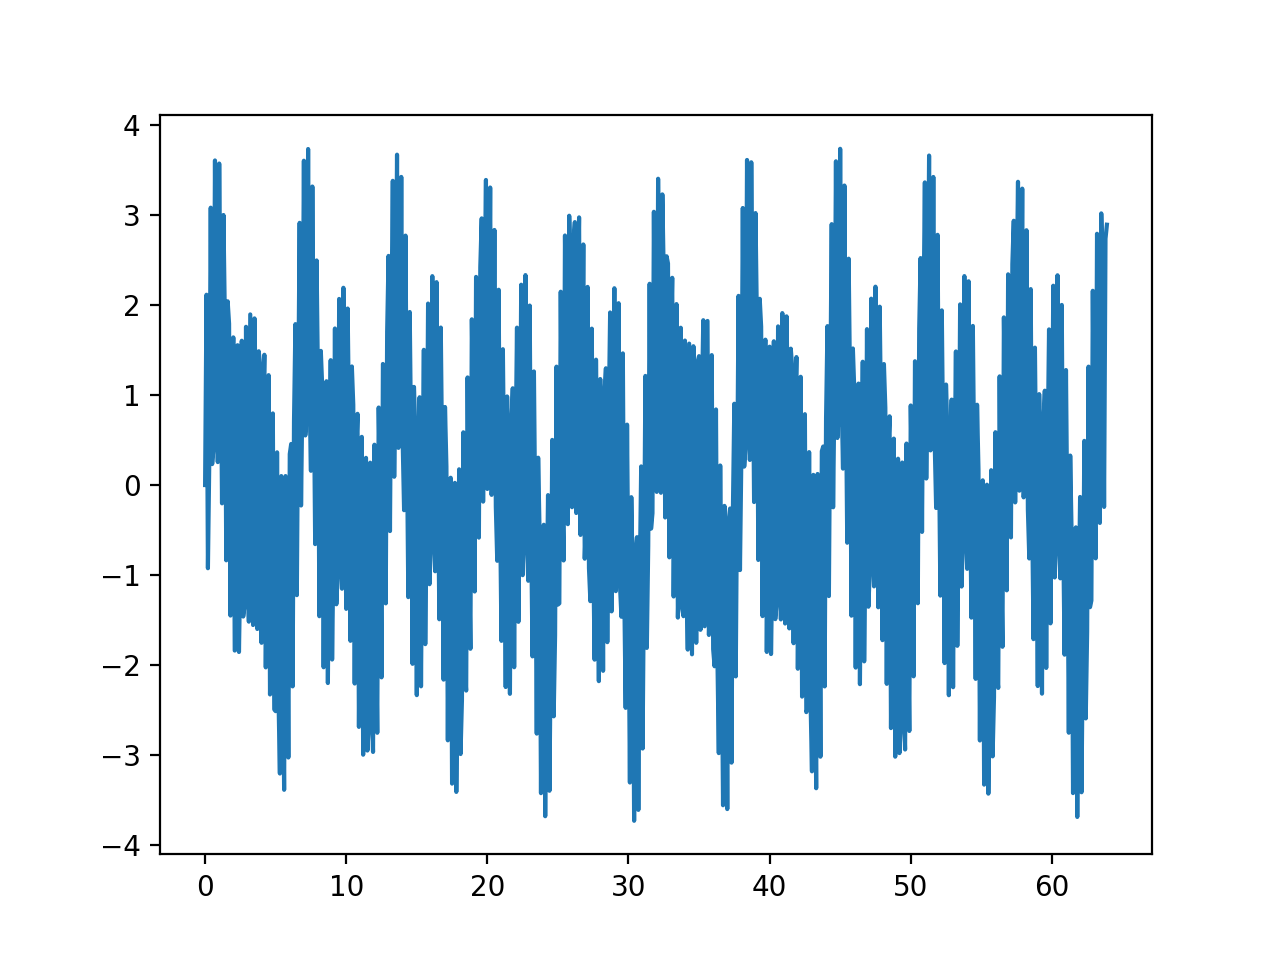

In [137]:
noise_frequency = 20
signal = np.add(signal, np.sin(noise_frequency * time))
plot(time, signal)

# Fourier Transform

<IPython.core.display.Javascript object>


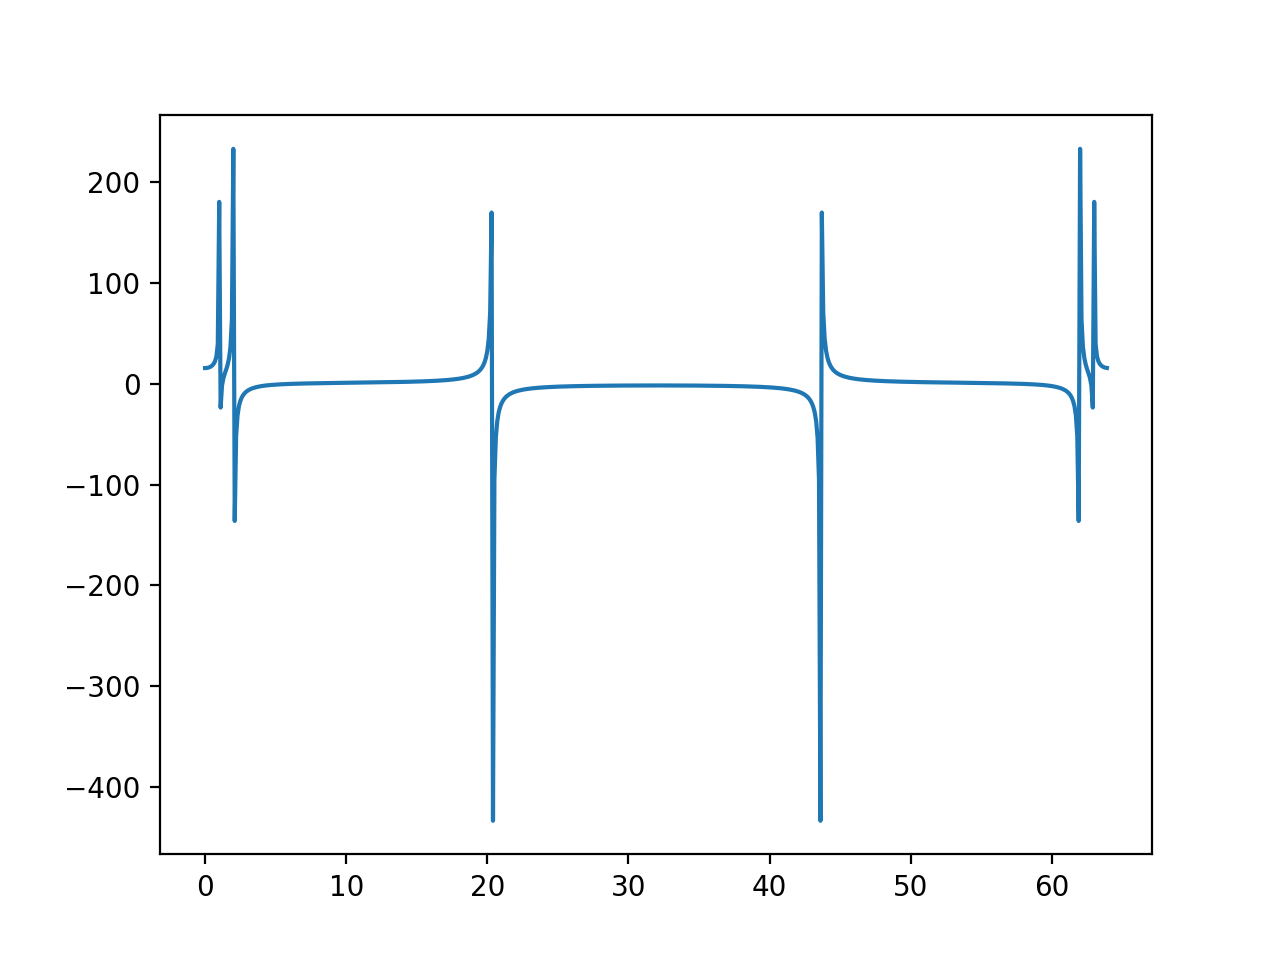

In [145]:
# compute W[k]
k = np.array(len(signal))
W_k = np.zeros([len(signal), len(signal)])
W_k_j = np.zeros([len(signal), len(signal)])
for k in range(len(signal)):
    for n in range(len(signal)):
        W_k[k][n] = np.cos(2*math.pi/len(signal) * n * k)
        W_k_j[k][n] = np.sin(2*math.pi/len(signal) * n * k)
        
# multiply the signal by this matrix
dft_real = np.dot(W_k, signal)
dft_img = np.dot(W_k_j, signal)
plot(time, dft_real)
#plot(time, dft_img)

# Remove high frequency noise

<IPython.core.display.Javascript object>


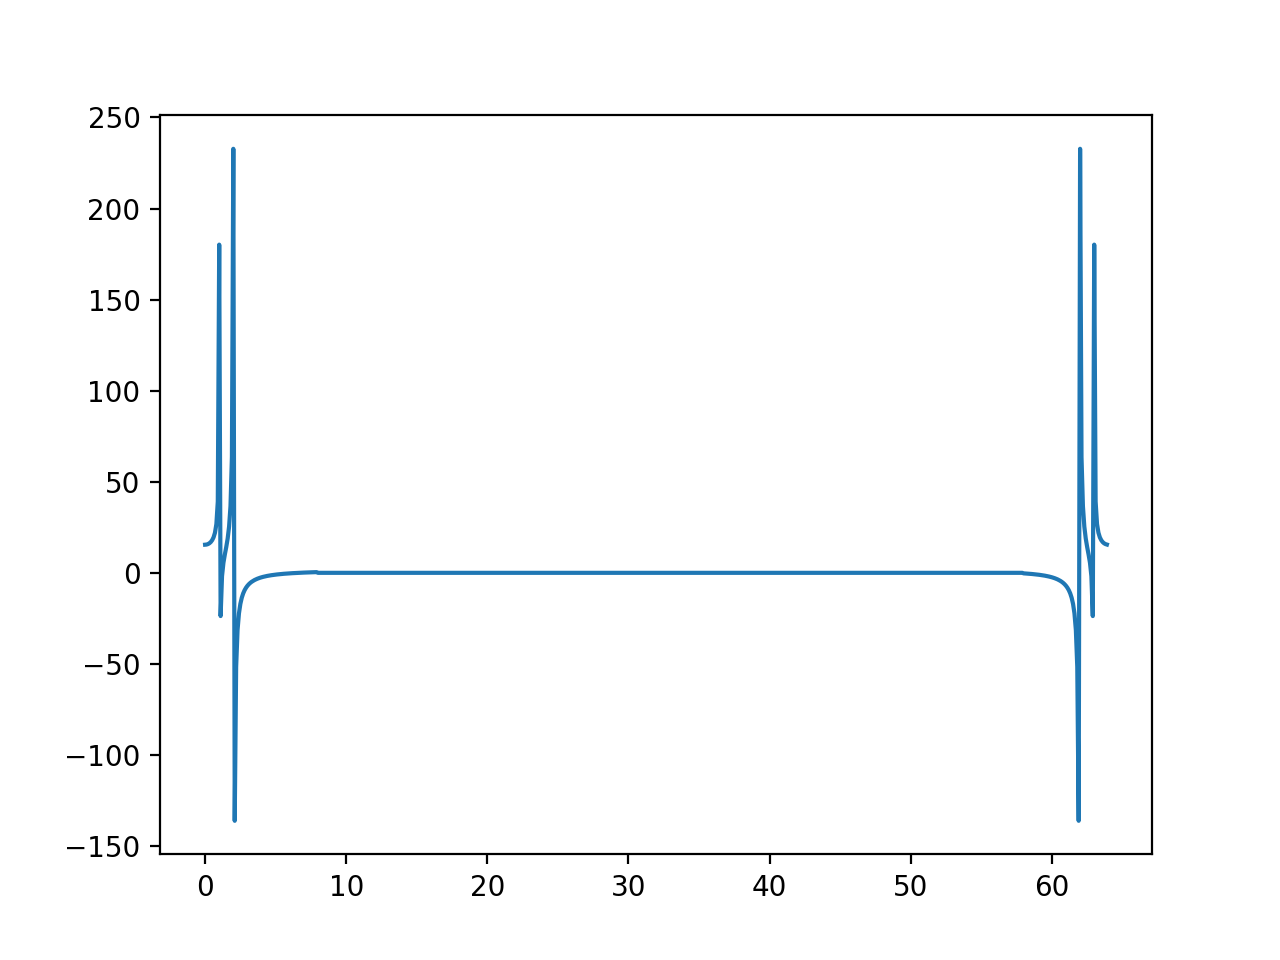

In [155]:
dft_real[8*10:58*10] = 0
plot(time, dft_real)

# Synthesize signal back

<IPython.core.display.Javascript object>


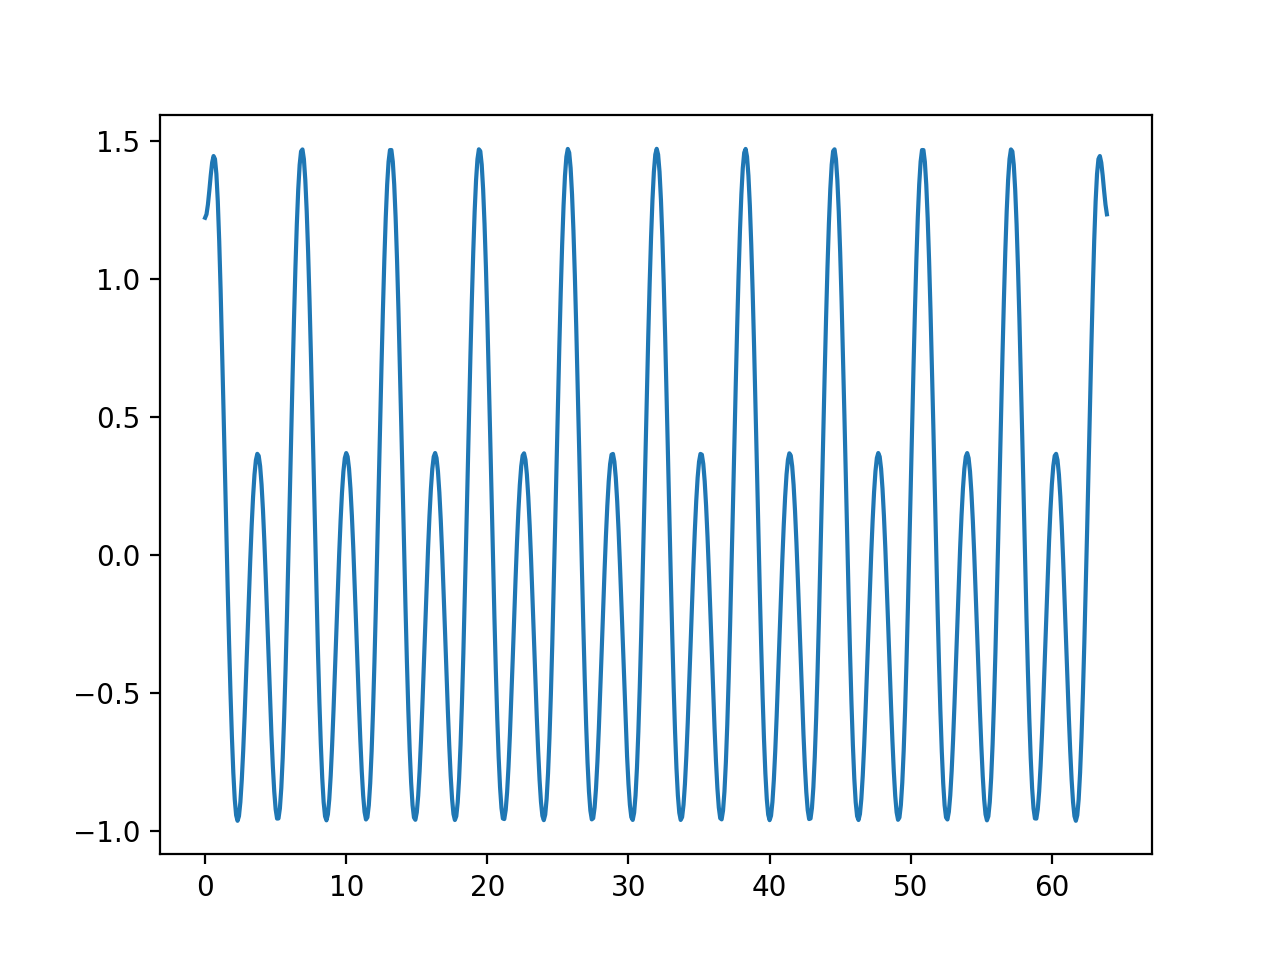

In [156]:
X_new = np.dot(dft_real, W_k) / len(signal)
X_new_img = np.dot(dft_img, W_k)
plot(time, X_new)